In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

import re


## Data Loading & Preprocessing
you can get the latest data from [keggle](https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews)

In [2]:
df = pd.read_csv('Reviews.csv')
df = df[['Text', 'Score']].dropna()
df = df[df['Score'] != 3]  # Remove neutrals
df['sentiment'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)

In [3]:
print("Data shape:", df.shape)
print(df.head())

Data shape: (525814, 3)
                                                Text  Score  sentiment
0  I have bought several of the Vitality canned d...      5          1
1  Product arrived labeled as Jumbo Salted Peanut...      1          0
2  This is a confection that has been around a fe...      4          1
3  If you are looking for the secret ingredient i...      2          0
4  Great taffy at a great price.  There was a wid...      5          1


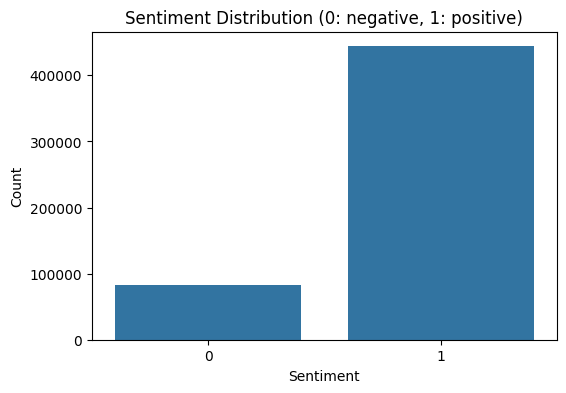

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution (0: negative, 1: positive)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Text cleaning

In [5]:
def clean_text(text):
    text = text.lower()
    text = re.sub('[^a-z\s]', '', text)
    return text

df['Text'] = df['Text'].apply(clean_text)

## sampling data

In [6]:
df_sample = df.sample(10000, random_state=42)

## Splitting the Data & TF-IDF Vectorization

In [7]:
X = df_sample['Text']
y = df_sample['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tfidf = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


## training

In [8]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

## Model Evaluation

In [9]:
y_pred = model.predict(X_test_tfidf)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print(classification_report(y_test, y_pred))

Accuracy: 0.8746666666666667
              precision    recall  f1-score   support

           0       0.92      0.22      0.35       469
           1       0.87      1.00      0.93      2531

    accuracy                           0.87      3000
   macro avg       0.90      0.61      0.64      3000
weighted avg       0.88      0.87      0.84      3000



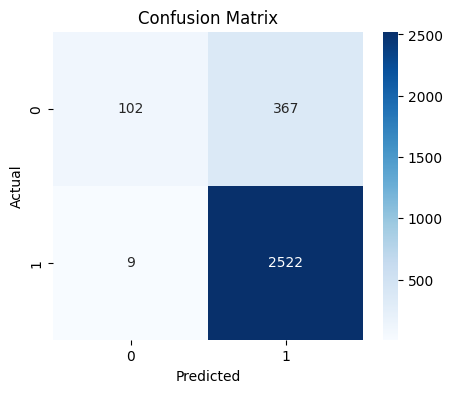

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [11]:
y_prob = model.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


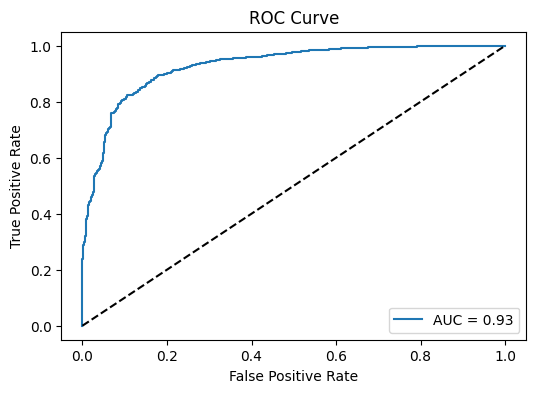

In [12]:
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## Results
Accuracy: ~87%

Key Findings:

  High recall for positive class (1.00)

  Low recall for negative class (0.22)